## Business case : Predicting the insurance cost with the given features

### Domain Analysis : Basic understanding of the features
##### age: age of the client
##### sex: insurance contractor gender: female, male
##### bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
##### children: Number of children covered by health insurance / Number of dependents
##### smoker: whether the client is a smoker or not
##### region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
##### charges: Individual medical costs billed by health insurance

In [1]:
## Importing the libraries

import pandas as pd ## pandas is used to manipulate the dataframe
import numpy as np ## numpy is used to do scientific calculation
import matplotlib.pyplot as plt ## matplotlib is used for visualization
import seaborn as sns ## seaborn is used for visualization
%matplotlib inline
import warnings ## used to remove warnings
warnings.filterwarnings('ignore')

In [2]:
## Importing the data

data=pd.read_csv(r"C:\Users\ASMITHA\Downloads\Data Science\insurance project\datasets_13720_18513_insurance(1).csv")

In [3]:
## Getting the data

data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Basic checks

In [4]:
data.head() ## getting the first five rows of the data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.tail() ## getting the last five rows of the data

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
data.describe()  ## getting the descriptive statistical details  of the dataframe

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
data.info() ## getting the information of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Exploratory Data Analysis

## Univarient Analysis

In [8]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
data.shape

(1338, 7)

###### There are 1338 rows and 7 columns in this dataset

In [10]:
## Analysing age

data['age'].nunique()  ## finding the unique values in age column

47

In [11]:
data.age.value_counts() ## different ages

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

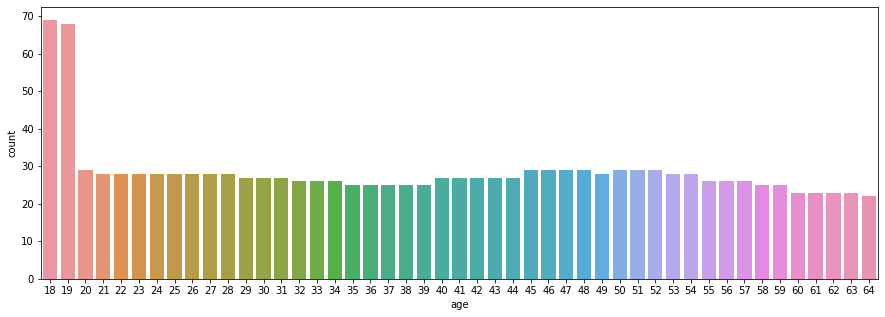

In [12]:
## Analysing age using count plot

plt.figure(figsize=(15,5))
sns.countplot(x='age',data=data)
plt.show()

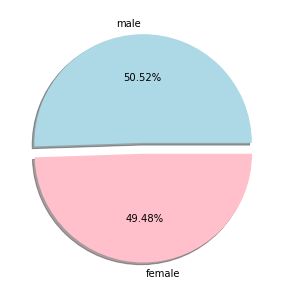

In [13]:
## Analysing sex
## Male vs Female ratio

plt.figure(figsize=(5,5))
labels=['male','female']
size=data['sex'].value_counts()
colors=['lightblue','pink']
explode=[0,0.1]
plt.pie(size,labels=labels,colors=colors,explode=explode,autopct='%.2f%%',shadow=True)
plt.show()

<AxesSubplot:xlabel='bmi', ylabel='Density'>

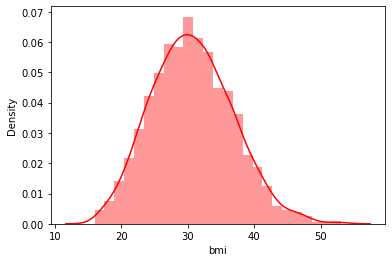

In [14]:
## Analysing bmi

sns.distplot(data.bmi,color='red')

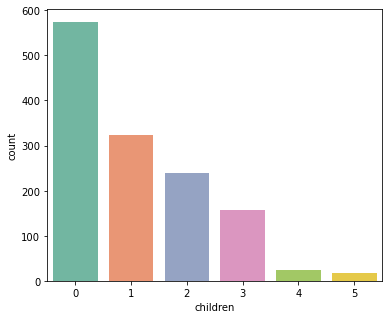

In [15]:
## Analysing children using count plot

plt.figure(figsize=(6,5))
sns.countplot(x='children',data=data,palette='Set2')
plt.show()



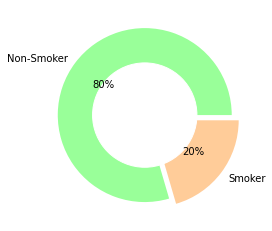

In [115]:
## Analysing smoker
## smoker vs non-smoker ratio 

labels=['Non-Smoker','Smoker']
size=data['smoker'].value_counts()
colors=['#99ff99','#ffcc99']
explode=(0,0.1)
plt.pie(size,labels=labels,colors=colors,explode=explode,autopct='%2.f%%')
circle = plt.Circle( (0,0),0.6, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.show()

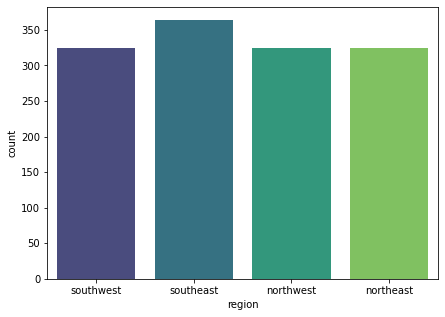

In [17]:
## Analysing region using count plot

plt.figure(figsize=(7,5))
sns.countplot(x='region',data=data,palette='viridis')
plt.show()

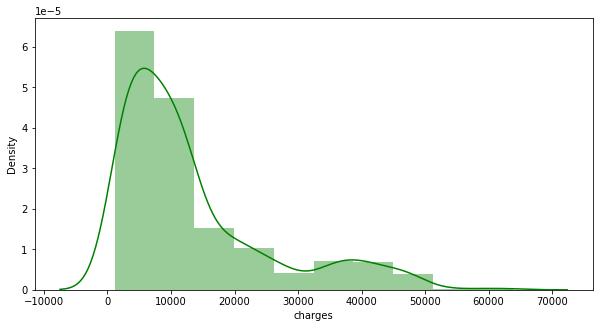

In [18]:
## Analysing charges 

plt.figure(figsize=(10,5))
sns.distplot(data.charges,color='green',bins=10)
plt.show()

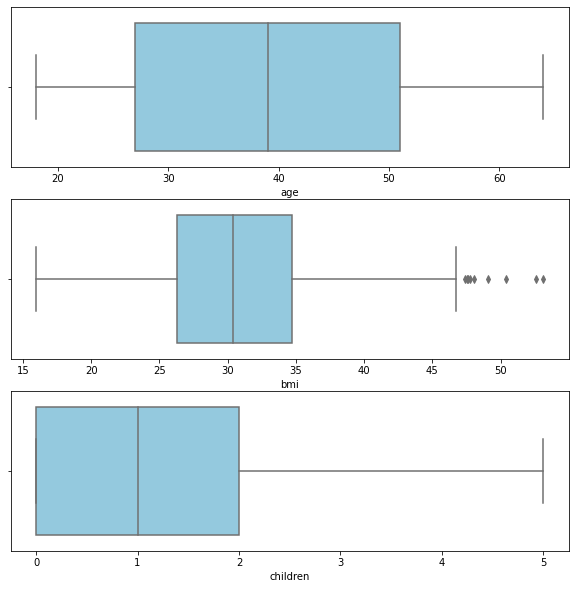

In [19]:
##  checking outliers 

box=data[['age','bmi','children']]
plt.figure(figsize=(10,10), facecolor='white')
plotnumber = 1

for column in box:#acc
    if plotnumber<=3 : # as there are 7 columns in the data
        ax = plt.subplot(3,1,plotnumber)#plotting 3 graphs
        sns.boxplot(x=box[column],color='skyblue')#boxplot to check for outlier
        plt.xlabel(column,fontsize=10)#assign name to x-axis and font size as 10
        
    plotnumber+=1#counter increment 
plt.show()#to show plot

## Bivarient  and Multivarient analysis

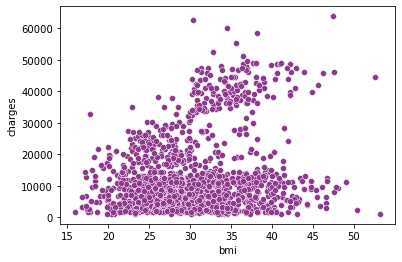

In [20]:
## Analysing bmi vs charges

sns.scatterplot(x='bmi',y='charges',data=data,color='#8E388E')
plt.show()

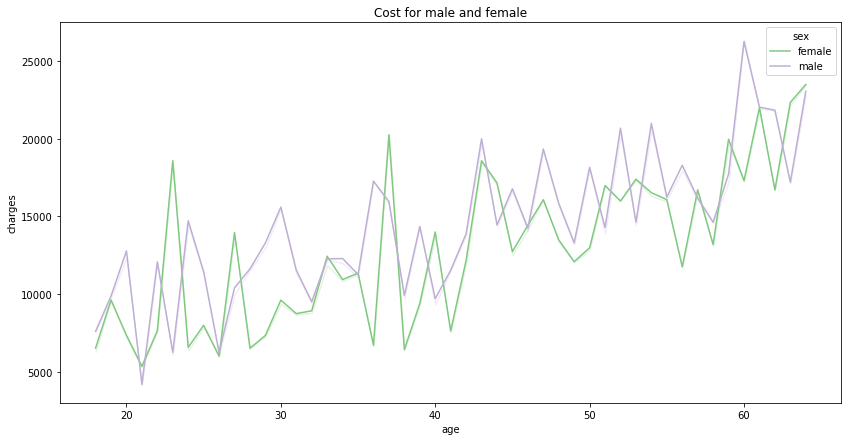

In [21]:
## Analysing age and charges by sex using line plot

plt.figure(figsize=(14,7))
sns.lineplot(data["age"],data["charges"],hue=data["sex"],ci=0,palette='Accent').set(title= 'Cost for male and female')
plt.legend=(1, 1)
plt.show()

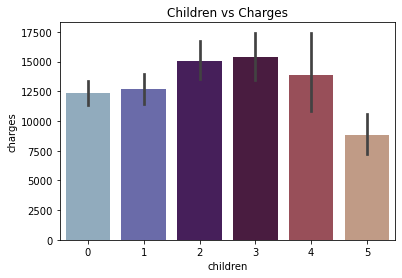

In [22]:
## Analysing children vs charges using count plot

sns.barplot(x=data.children,y=data.charges,palette='twilight').set(title="Children vs Charges")
plt.show()

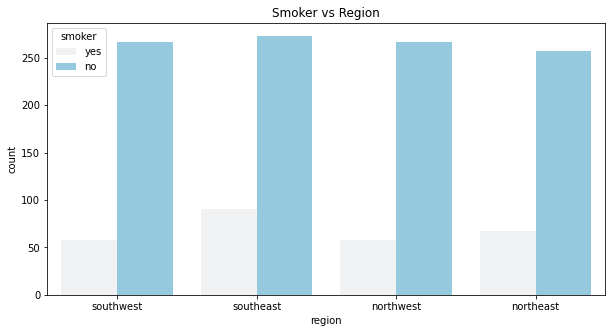

In [23]:
#Analysing region vs smoker uisng count plot
plt.figure(figsize=(10,5))
sns.countplot(x='region',hue='smoker',color='skyblue',data=data).set(title="Smoker vs Region")
plt.show()

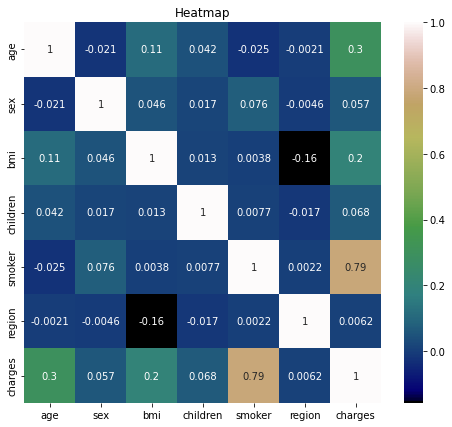

In [113]:
##Heatmap to find the correlation

plt.figure(figsize=(8,7))
sns.heatmap(data.corr(),annot=True,cmap='gist_earth')
plt.title("Heatmap")
plt.show()

## Data Preprocessing

In [24]:
# handling the missing values ## there is no missing values

data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [25]:
## converting categorical data to numerical data

In [26]:
data['smoker'].unique()  

array(['yes', 'no'], dtype=object)

In [27]:
data.smoker=data.smoker.map({'yes':1,'no':0}) ## smoker=1,non-smoker=0

In [28]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [29]:
data.region=data.region.map({'southwest':0,'southeast':1,'northwest':2,'northeast':3})

In [30]:
data.sex=pd.get_dummies(data.sex,drop_first=True)  ## onehot encoding is done,female is 0 and male is 1

In [31]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


## Model creation

In [32]:
## defining independent and dependent variables

x=data.iloc[:,0:-1] # independent variables
y=data.charges  # dependent variable

In [33]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,0
1,18,1,33.770,1,0,1
2,28,1,33.000,3,0,1
3,33,1,22.705,0,0,2
4,32,1,28.880,0,0,2
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2
1334,18,0,31.920,0,0,3
1335,18,0,36.850,0,0,1
1336,21,0,25.800,0,0,0


In [34]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [35]:
## Defining the training data and the testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [36]:
x_train.shape

(1003, 6)

In [37]:
x_test.shape

(335, 6)

In [38]:
from sklearn.linear_model import LinearRegression   ## importing the model library

LR=LinearRegression()  ## importing the model object
LR.fit(x_train,y_train) ## fitting the training data

x_test_pred=LR.predict(x_test)

In [39]:
x_test_pred

array([ 8917.54106359,  7057.659731  , 36899.8708097 ,  9546.15877323,
       26950.91414625, 10756.81129984,   110.22869716, 17039.89853046,
         986.98094539, 11318.40928727, 27959.29316402,  9452.32982265,
        5222.10612385, 38466.47603466, 40340.10507845, 37149.4535954 ,
       15259.14589125, 35895.17954336,  9120.84172439, 31442.58115369,
        3723.95224278, 10051.46909241,  2217.99081229,  7016.63069487,
       11338.01161132, 12930.95780971, 14408.72962928,  6129.47379121,
        9917.59150303,  2169.52986706,  8966.46437456, 13123.3402391 ,
        4495.28487533,  3386.82377135,  4329.78730663, 13041.80740785,
        1768.87632392,  8665.74216929, 33280.34641384, 32602.75057167,
        3700.75706773,  4343.42320809, 14032.7103358 , 11545.84902818,
        8813.53969858, 12062.88158511,  5231.42419487,  2955.58371562,
       35536.42907912,  9183.63264624, 15891.85804801,  2337.51811118,
       12367.13541434,  1414.32988846, 13490.60701704, 12602.54262341,
      

In [40]:
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
342     13217.09450
308     11944.59435
1128    14358.36437
503     32548.34050
1197     5699.83750
Name: charges, Length: 335, dtype: float64

In [41]:
x_train_pred=LR.predict(x_train)

x_train_pred

array([ 1841.97541608,  4351.61796476, 14096.02955164, ...,
       11488.96161685, 37122.4816677 , 11404.8151864 ])

In [42]:
y_train

693      2352.96845
1297     4340.44090
634      9391.34600
1022    42211.13820
178      8823.27900
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1003, dtype: float64

## Model Evaluation :- Linear Regression

In [43]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [44]:
## prediction on training data

train_score=r2_score(y_train,x_train_pred)

In [45]:
print('Linear Regression training score :',train_score)

Linear Regression training score : 0.7449087316606229


In [46]:
## prediction on testing data

test_score=r2_score(y_test,x_test_pred)

print('Linear Regression testing score :',test_score)

Linear Regression testing score : 0.7668905583460908


In [47]:
## mean squared error and mean absolute error of training data

print('MSE:',mean_squared_error(y_train,x_train_pred))
print('MAE:',mean_absolute_error(y_train,x_train_pred))

MSE: 37011292.58315399
MAE: 4182.669944366752


In [48]:
## mean squared error and mean absolute error of testing data

print('MSE',mean_squared_error(y_test,x_test_pred))
print('MAE',mean_absolute_error(y_test,x_test_pred))

MSE 35174149.32705307
MAE 4252.856455792366


In [49]:
## Root mean squared error

import math
print(math.sqrt(mean_squared_error(y_test,x_test_pred)))

5930.779824530082


In [50]:
x_train.shape,x_test.shape

((1003, 6), (335, 6))

In [51]:
## adjusted r2 score

train_adjusted_r2score=1-(1-0.71)*(1003-1)/(1003-6-1)
train_adjusted_r2score

0.7082530120481927

In [52]:
test_adjusted_r2score=1-(1-0.74)*(335-1)/(335-6-1)
test_adjusted_r2score

0.7352439024390244

## Model Evaluation :- Decision Tree Regressor

In [53]:
from sklearn.tree import DecisionTreeRegressor ## importing decision tree from sklearn.tree

dtr=DecisionTreeRegressor(criterion='mse',splitter='best',random_state=42)
dtr.fit(x_train,y_train)  ## training the model
x_test_pred=dtr.predict(x_test)  ## predicting
x_test_pred ## x --predicted testing data

array([28340.18885,  5469.0066 , 28950.4692 ,  9500.57305, 33732.6867 ,
       11326.71487,  2128.43105, 14313.8463 ,  2680.9493 ,  9249.4952 ,
       19361.9988 ,  6600.361  ,  3956.07145, 46200.9851 , 48173.361  ,
       48885.13561, 10806.839  , 42760.5022 , 10702.6424 , 21348.706  ,
        5615.369  , 18806.14547,  1253.936  ,  2741.948  , 10493.9458 ,
       10435.06525, 12648.7034 ,  4618.0799 ,  9447.25035,  1135.9407 ,
        7682.67   , 11840.77505,  2026.9741 ,  5325.651  ,  2902.9065 ,
        9704.66805,  2331.519  ,  7633.7206 , 22218.1149 , 37742.5757 ,
       18838.70366,  2639.0429 , 10976.24575, 12142.5786 ,  5989.52365,
       12913.9924 ,  4830.63   ,  5615.369  , 40273.6455 ,  4673.3922 ,
       13981.85035,  2801.2588 ,  6393.60345,  1708.0014 , 10976.24575,
       10370.91255,  3736.4647 , 39983.42595, 12231.6136 , 27346.04207,
       13393.756  ,  4949.7587 , 15555.18875,  7201.70085, 20878.78443,
       12609.88702, 16232.847  ,  8782.469  ,  3176.8159 ,  1526

In [54]:
y_test ## y-- testing data

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
342     13217.09450
308     11944.59435
1128    14358.36437
503     32548.34050
1197     5699.83750
Name: charges, Length: 335, dtype: float64

In [55]:
x_train_pred=dtr.predict(x_train)
x_train_pred  ## x-- predicted training data

array([ 2352.96845,  4340.4409 ,  9391.346  , ..., 11931.12525,
       46113.511  , 10214.636  ])

In [56]:
y_train  ## y--training data

693      2352.96845
1297     4340.44090
634      9391.34600
1022    42211.13820
178      8823.27900
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1003, dtype: float64

In [57]:
## Mean Squared Error and Mean Absolute Error for training data 

print('MSE:', mean_squared_error ((y_train),(x_train_pred)))
print('MAE:',mean_absolute_error((y_train),(x_train_pred)))

MSE: 182648.17106092346
MAE: 19.084122482552342


In [58]:
## Mean Squared Error and Mean Absolute Error for testing data 

print('MSE:',mean_squared_error((y_test),(x_test_pred)))
print('MAE:',mean_absolute_error((y_test),(x_test_pred)))

MSE: 39699649.00878546
MAE: 2929.6821737283585


In [59]:
##finding the score for training data and testing data

print("Training score for Decision Tree  : ", dtr.score(x_train,y_train))
print("Testing score for Decision Tree : ", dtr.score(x_test,y_test))

Training score for Decision Tree  :  0.9987411422200098
Testing score for Decision Tree :  0.736898739803312


###### There is less error in training data and more error in testing data so it is overfitting.

## Hyperparametric Tuning for Decision Tree

In [60]:
from sklearn.model_selection import RandomizedSearchCV  ## importing randomized search cv

In [61]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9],
           "min_samples_leaf":[1,2,3,4,5,],
           "max_features":["auto","sqrt"],
           "max_leaf_nodes":[5,10,15] }


In [62]:
hyper_tuning = RandomizedSearchCV(estimator=dtr, param_distributions = parameters,
                               cv = 2, n_iter = 10, n_jobs=-1)

In [63]:
hyper_tuning.fit(x_train, y_train)


RandomizedSearchCV(cv=2,
                   estimator=DecisionTreeRegressor(criterion='mse',
                                                   random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [1, 3, 5, 7, 9],
                                        'max_features': ['auto', 'sqrt'],
                                        'max_leaf_nodes': [5, 10, 15],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'splitter': ['best', 'random']})

In [64]:
hyper_tuning.best_params_   ## getting the best parameters

{'splitter': 'best',
 'min_samples_leaf': 2,
 'max_leaf_nodes': 15,
 'max_features': 'auto',
 'max_depth': 5}

In [65]:
dtr_hyper=DecisionTreeRegressor(splitter='best',min_samples_leaf=4,max_leaf_nodes=15,max_features='auto',max_depth=7)

In [66]:
dtr_hyper.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=7, max_features='auto', max_leaf_nodes=15,
                      min_samples_leaf=4)

In [67]:
tuning_predict=dtr_hyper.predict(x_test)

In [68]:
tuning_predict

array([10580.06731878,  5653.08998613, 27503.00828667, 10580.06731878,
       36162.94725514,  5653.08998613,  3176.71556648, 14014.2686275 ,
        5653.08998613, 10580.06731878, 18557.77048356,  7233.79968598,
        5653.08998613, 42764.66477585, 46910.03729867, 42764.66477585,
       10580.06731878, 42764.66477585, 10580.06731878, 27503.00828667,
        7233.79968598, 10580.06731878,  3176.71556648,  3176.71556648,
       10580.06731878, 12845.40752091, 14014.2686275 ,  7233.79968598,
       10580.06731878,  3176.71556648,  7233.79968598, 12845.40752091,
        3176.71556648,  7233.79968598,  5653.08998613, 10580.06731878,
        3176.71556648, 10580.06731878, 23195.17850957, 42764.66477585,
        3176.71556648,  3176.71556648, 12845.40752091, 14014.2686275 ,
        7233.79968598, 15993.72164706,  3176.71556648,  7233.79968598,
       42764.66477585,  7233.79968598, 14014.2686275 ,  3176.71556648,
        5653.08998613,  3176.71556648, 12845.40752091, 10580.06731878,
      

In [69]:
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
342     13217.09450
308     11944.59435
1128    14358.36437
503     32548.34050
1197     5699.83750
Name: charges, Length: 335, dtype: float64

In [70]:
print('Decision Tree Regressor hyperparameter score training :',hyper_tuning.score(x_train,y_train))

Decision Tree Regressor hyperparameter score training : 0.8698632307313555


In [71]:
print('Decision Tree Regressor hyperparameter score testing :', hyper_tuning.score(x_test,y_test))

Decision Tree Regressor hyperparameter score testing : 0.8476267205288059


## Model Evaluation :- Random Forest Regressor

In [72]:
from sklearn.ensemble import RandomForestRegressor  ## importing random forest

In [73]:
rfr=RandomForestRegressor(n_estimators=100,random_state=42)
rfr.fit(x_train,y_train) ## fitting the training data

RandomForestRegressor(random_state=42)

In [74]:
x_test_pred=rfr.predict(x_test) ## predicting the testing data

x_test_pred

array([12210.2099471 ,  5288.6852225 , 28335.5829505 , 11540.8179426 ,
       34547.2388335 ,  8269.7370141 ,  2164.243365  , 14216.753573  ,
        5179.7948413 , 10814.7756021 , 19634.6496733 ,  7057.6286235 ,
        4861.481102  , 45975.4494    , 48625.2947165 , 45399.7951834 ,
       10237.3237836 , 42515.2780159 , 10647.8483168 , 23447.0530009 ,
        5464.9497367 ,  9793.9213386 ,  2161.9312649 ,  2878.798495  ,
       11799.0812687 , 12458.0213255 , 14589.3936184 ,  6403.5021107 ,
       11723.2116165 ,  3342.31443749,  7748.7999324 , 11765.076321  ,
        2159.1281995 ,  5435.7972785 ,  3175.4210745 , 11522.7513319 ,
        2899.7748967 ,  8478.8912251 , 24072.969559  , 39850.9757774 ,
        8079.1278076 ,  3355.3286859 , 13835.0617688 , 14527.4952021 ,
        5748.6976396 , 16501.4608812 , 15853.9109119 ,  6337.0290481 ,
       41772.3737128 ,  6328.1895611 , 14087.5962156 ,  2176.29623155,
        7024.329751  ,  1757.366528  , 10996.779215  , 10972.1088995 ,
      

In [75]:
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
342     13217.09450
308     11944.59435
1128    14358.36437
503     32548.34050
1197     5699.83750
Name: charges, Length: 335, dtype: float64

In [76]:
x_train_pred=rfr.predict(x_train) ## predicting the training data

x_train_pred

array([ 4263.5882575,  4339.1666275,  9389.96349  , ..., 12410.0701707,
       44697.223951 , 11326.7248712])

In [77]:
y_train ## y--training data

693      2352.96845
1297     4340.44090
634      9391.34600
1022    42211.13820
178      8823.27900
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1003, dtype: float64

In [78]:
print('Random Forest Training score :',rfr.score(x_train,y_train))

Random Forest Training score : 0.9758145448997859


In [79]:
print('Random Forest Testing Score :',rfr.score(x_test,y_test))

Random Forest Testing Score : 0.8470406801075995


##### There is less error in training data and more error in testing data ,so it is overfitting.

## Hyperparametric Tuning for Random Forest

In [80]:
from sklearn.model_selection import RandomizedSearchCV

In [81]:
grid={'n_estimators':[int(x) for x in np.linspace(start=100,stop=1200,num=12)],
      'max_features':['auto','log2'],
      'max_depth':[int(x) for x in np.linspace(5,30,num=6)],
      'min_samples_split':[2,5,10,15,100],
      'min_samples_leaf':[1,2,5,10]}

In [82]:
hyper_tuning=RandomizedSearchCV(estimator=rfr,param_distributions=grid,n_iter=10,cv=5,verbose=5,random_state=2)

In [83]:
hyper_tuning.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800;, score=0.845 total time=   3.0s
[CV 2/5] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800;, score=0.830 total time=   3.0s
[CV 3/5] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800;, score=0.805 total time=   3.2s
[CV 4/5] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800;, score=0.765 total time=   3.2s
[CV 5/5] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800;, score=0.844 total time=   3.3s
[CV 1/5] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1000;, score=0.858 total time=   5.1s
[CV 2/5] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1000;,

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=2, verbose=5)

In [84]:
hyper_tuning.best_params_

{'n_estimators': 300,
 'min_samples_split': 5,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 10}

In [85]:
rfr_hyper=RandomForestRegressor(n_estimators=700,min_samples_split=5,min_samples_leaf=10,max_features='auto',max_depth=20)

In [86]:
rfr_hyper.fit(x_train,y_train)

RandomForestRegressor(max_depth=20, max_features='auto', min_samples_leaf=10,
                      min_samples_split=5, n_estimators=700)

In [87]:
tuning_predict=rfr_hyper.predict(x_test)

In [88]:
tuning_predict

array([10475.26429238,  5335.41303935, 27051.25065075, 10554.80864282,
       35054.91363205,  6498.25974065,  2111.52227034, 14126.91168634,
        5480.56927409, 11804.9289454 , 18963.35570487,  7861.2125813 ,
        4786.4787427 , 45423.71681278, 47524.96761868, 45415.80811916,
       10565.36172955, 45214.53097497, 10571.92972649, 24938.92309803,
        5696.15107726,  9057.07576678,  1948.81093478,  3323.26521682,
       12542.03643286, 12722.19282399, 13891.44828906,  6410.80312818,
       11905.81183768,  2036.34261227,  7834.4589275 , 12439.57894358,
        2893.35407794,  6621.47101456,  3804.39940548, 10770.01734404,
        3629.7796288 ,  8524.81500852, 24239.54278941, 41757.05159558,
        4696.2210886 ,  5070.80015329, 12623.85495087, 14110.02727587,
        6699.89902972, 16493.07930376,  7389.28331793,  5466.04056565,
       43555.12251849,  6152.58986161, 14265.09726777,  3666.09987486,
        7559.44593501,  2758.65342697, 11896.48469734, 11669.14339543,
      

In [89]:
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
342     13217.09450
308     11944.59435
1128    14358.36437
503     32548.34050
1197     5699.83750
Name: charges, Length: 335, dtype: float64

In [90]:
print('Random Forest Regressor hyper parametric tuning for training :',rfr_hyper.score(x_train,y_train))

Random Forest Regressor hyper parametric tuning for training : 0.8904609394916875


In [91]:
print('Random Forest Regressor hyper parametric tuning for testing :',rfr_hyper.score(x_test,y_test))

Random Forest Regressor hyper parametric tuning for testing : 0.8648799609901484


## Gradient Boosting

In [92]:
from sklearn.ensemble import GradientBoostingRegressor

In [93]:
gbr=GradientBoostingRegressor()

In [94]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [95]:
x_pred=gbr.predict(x_test)

x_pred

array([10824.12609662,  5608.41637992, 28475.56854709,  9684.34132176,
       34255.13957508,  4694.4502878 ,  1992.25347738, 15222.82548661,
        4600.35782708, 10672.99284436, 18639.39713665,  7639.51522107,
        4818.31862011, 45372.36921716, 47213.23641278, 45221.86953047,
       12096.07185281, 45327.73932083,  9261.1673126 , 23590.41430989,
        5817.28667014,  8944.98236497,  1669.59098442,  4272.72486121,
       11571.12619051, 13229.82684669, 14697.66737229,  6622.82314428,
       11662.33543438,  3022.52423012,  7450.91347669, 11974.45133806,
        2874.7445025 ,  6043.57862789,  4735.71406502, 10026.81686506,
        4030.4841842 ,  8565.94841278, 25150.55859039, 40693.05346725,
       10401.42623888,  4492.58825841, 14205.93458058, 14339.74867497,
        7272.6504957 , 16497.8482933 ,  5859.16307627,  6496.10062802,
       43107.18441214,  5948.90565584, 14599.91552957,  2718.14148838,
        6857.09693647,  2526.10260189, 11944.28093172, 11895.19489254,
      

In [96]:
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
342     13217.09450
308     11944.59435
1128    14358.36437
503     32548.34050
1197     5699.83750
Name: charges, Length: 335, dtype: float64

In [97]:
print('r2_score for testing data :',r2_score(x_pred,y_test))

r2_score for testing data : 0.8492775715211027


In [98]:
print('Training score for Gradient Boosting :',gbr.score(x_train,y_train))

Training score for Gradient Boosting : 0.904808306110167


In [99]:
print('Testing score for Gradient Boosting :',gbr.score(x_test,y_test))

Testing score for Gradient Boosting : 0.8601889448658142
